# Actividad reconocimiento de placas

# Pregunta #1

In [1]:
from matplotlib import pyplot as plt

alto:  248  ancho:  400  canales: 3
alto:  248  ancho:  400


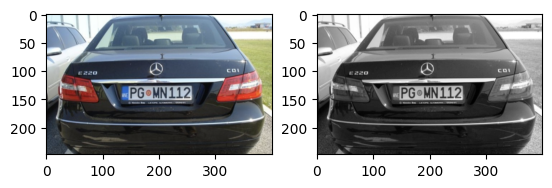

In [2]:
import cv2 as cv

img01=cv.imread('cars96.png')
img02=cv.imread('cars96.png',cv.IMREAD_GRAYSCALE)
alto1, ancho1, canales1 = img01.shape
alto2, ancho2= img02.shape

print("alto: ",alto1," ancho: ",ancho1," canales:", canales1)
print("alto: ",alto2," ancho: ",ancho2)

plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img01, cv.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(img02, cmap='gray')
# cv.waitKey(0)
# cv.destroyAllWindows()


# Pregunta 2

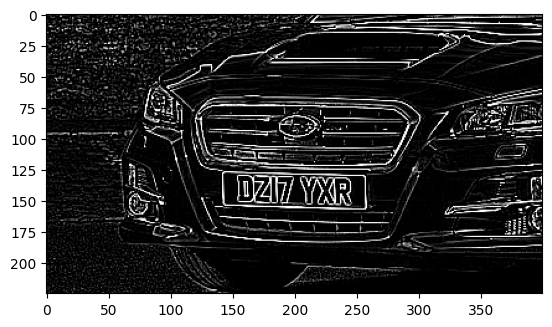

In [3]:
import cv2 as cv
import numpy as np

img_gris=cv.imread('cars3.png',cv.IMREAD_GRAYSCALE)

kernel = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

# kernel = np.array([[-1, -1, -1],
#                     [0, 0, 0],
#                     [1, 1, 1]])

 
img_ker = cv.filter2D(src=img_gris, ddepth=-1, kernel=kernel)
 
plt.imshow(img_ker, cmap='gray')
# cv.waitKey(0)
# cv.destroyAllWindows()


# Pregunta 3

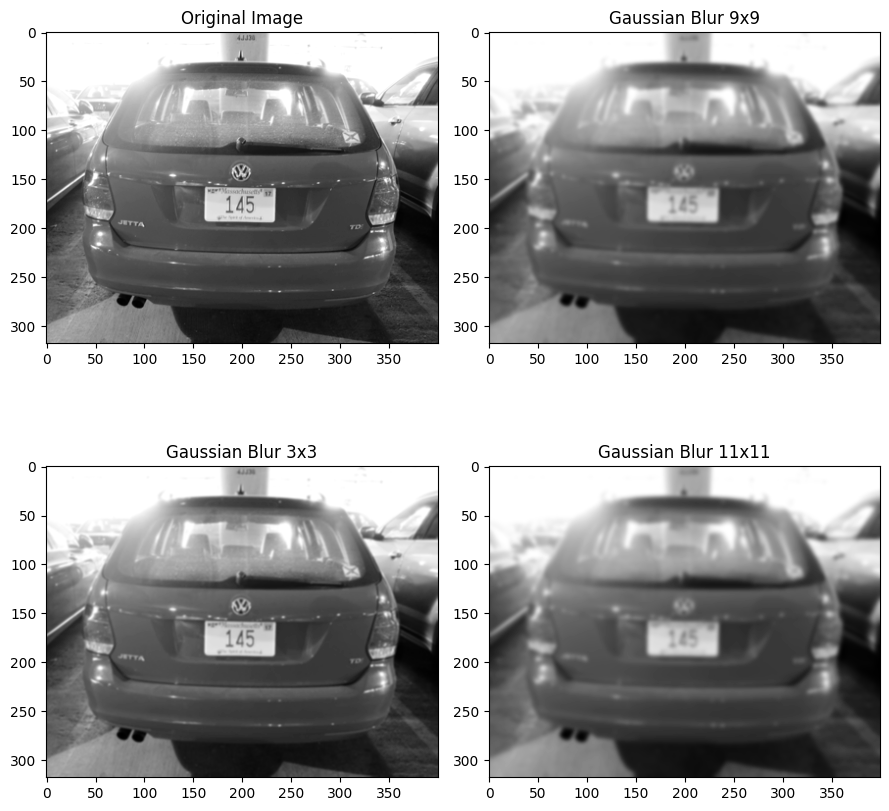

In [4]:
import cv2 as cv

img_gris=cv.imread('cars296.png',cv.IMREAD_GRAYSCALE)
kernel = cv.GaussianBlur(img_gris, (9, 9), 0)

fig, axs = plt.subplots(2, 2, figsize=(9, 9))

# Plot the images in each subplot
axs[0, 0].imshow(img_gris, cmap='gray')
axs[0, 0].set_title("Original Image")

axs[0, 1].imshow(kernel, cmap='gray')
axs[0, 1].set_title("Gaussian Blur 9x9")

axs[1, 0].imshow(cv.GaussianBlur(img_gris, (3, 3), 0), cmap='gray')
axs[1, 0].set_title("Gaussian Blur 3x3")

axs[1, 1].imshow(cv.GaussianBlur(img_gris, (11, 11), 0), cmap='gray')
axs[1, 1].set_title("Gaussian Blur 11x11")

# Automatically adjust the subplot parameters for a nicer layout
plt.tight_layout()

# Display the figure
plt.show()


# Pregunta 4

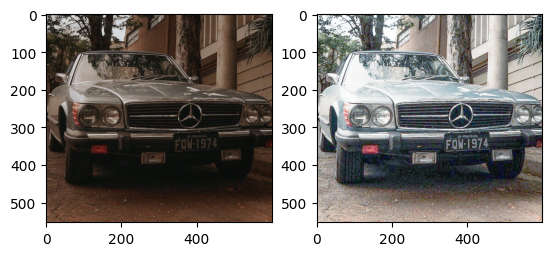

In [5]:
# Carga la imagen en color
import cv2 as cv
img = cv.imread('coche11.jpeg')

# Separa los canales de color de la imagen
b, g, r = cv.split(img)

# Ecualiza el histograma de cada canal de color
b_eq = cv.equalizeHist(b)
g_eq = cv.equalizeHist(g)
r_eq = cv.equalizeHist(r)

# Combina los canales de nuevo en una sola imagen
img_eq = cv.merge((b_eq, g_eq, r_eq))
# plt.imshow(cv.cvtColor(img_eq, cv.COLOR_BGR2RGB))
# cv.imshow('Equalizada', img_eq)


plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(img_eq, cv.COLOR_BGR2RGB))



# Ecualización adaptativa

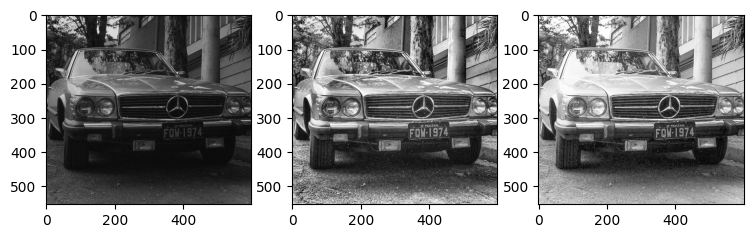

In [6]:
import cv2 as cv

img=cv.imread('coche11.jpeg',cv.IMREAD_GRAYSCALE)
clahe = cv.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
equ01 = clahe.apply(img)

equ02 = cv.equalizeHist(img)
# Mostrar la imagen original y la imagen equalizada

plt.figure(figsize=(9,12))

plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


plt.subplot(1,3,2)
plt.imshow(cv.cvtColor(equ01, cv.COLOR_BGR2RGB))

plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(equ02, cv.COLOR_BGR2RGB))

plt.show()

# cv.imshow('Original', img)
# cv.imshow('Equalizada Adaptativa', equ01)
# cv.imshow('Equalizada',equ02)
# cv.waitKey(0)
# cv.destroyAllWindows()


# Pregunta 5 Reconocimiento de placas

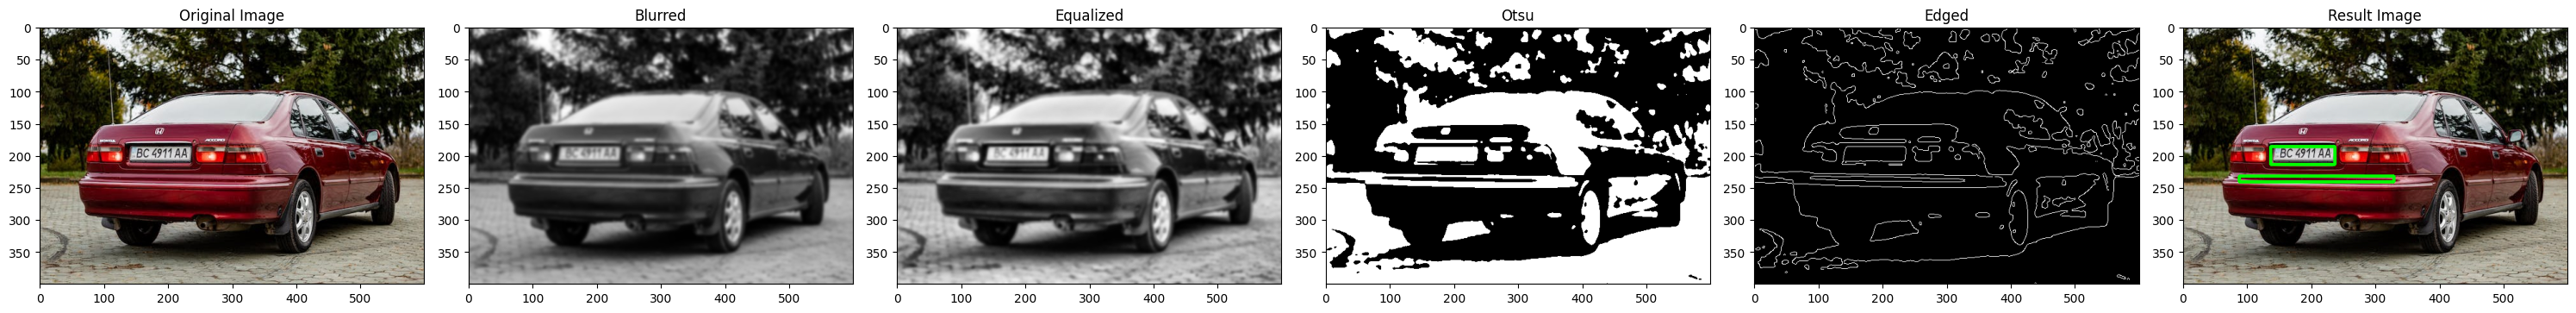

In [15]:
import cv2 as cv
import numpy as np

fig, axs = plt.subplots(1, 6, figsize=(30, 5))

#leemos imagen a clor img_color y la convertimos a niveles de gris
img_color = cv.imread('coche14.jpeg')
img_gris=cv.imread('coche14.jpeg',cv.IMREAD_GRAYSCALE)

# Plot the images in each subplot
axs[0].imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
axs[0].set_title("Original Image")

#aplicams un filtro gaussiano
blur = cv.GaussianBlur(img_gris, (11,11), 0)
# cv.imshow("Gaussiano",blur)

#alicamos mejora de contraste adaptativo
clahe = cv.createCLAHE(clipLimit=1.5, tileGridSize=(8,8))
equ01 = clahe.apply(blur)


#aplicamos el métod de binarización de Otsu
otsu_threshold, otsu01 = cv.threshold( equ01, 0, 255, cv.THRESH_OTSU)


#Aplicamos Canny
edges = cv.Canny(otsu01, 150, 350)


#obtenemos contornos a artir de los bordes de Canny
contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#Seleccionamos aquellos contornos que cumplen determinada condición
long_contours = [cnt for cnt in contours if (cv.arcLength(cnt, True) > 200 
                                             and (cv.arcLength(cnt, True) < 700))]

#de cada contorno obtenemos las coordenadas que encierran en un cuadrado a dicho contorno
alto, ancho, canales = img_color.shape
for lonc in (long_contours):
    #lonc contiene las coordenadas que forman un contorno
    r= [x for [[x,y]]  in lonc]
    s=[y for [[x,y]]  in lonc]
    prop=(max(s)-min(s))-(max(r)-min(r))
    #seleccionamos aquellas cuya ancho sea mayor que su altura
    if ((max(s)> round(alto/2)) and (prop<0)):
        cv.rectangle(img_color,(min(r),min(s)),(max(r),max(s)),(0,255,0),3)             

axs[ 1].imshow(blur, cmap='gray')
axs[ 1].set_title("Blurred")

axs[ 2].imshow(equ01, cmap='gray')
axs[ 2].set_title("Equalized")

axs[ 3].imshow(otsu01, cmap='gray')
axs[ 3].set_title("Otsu")

axs[ 4].imshow(edges, cmap='gray')
axs[ 4].set_title("Edged")

axs[ 5].imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
axs[ 5].set_title("Result Image")

# Automatically adjust the subplot parameters for a nicer layout

plt.tight_layout()
# Display the figure
plt.show()



# Pregunta 6

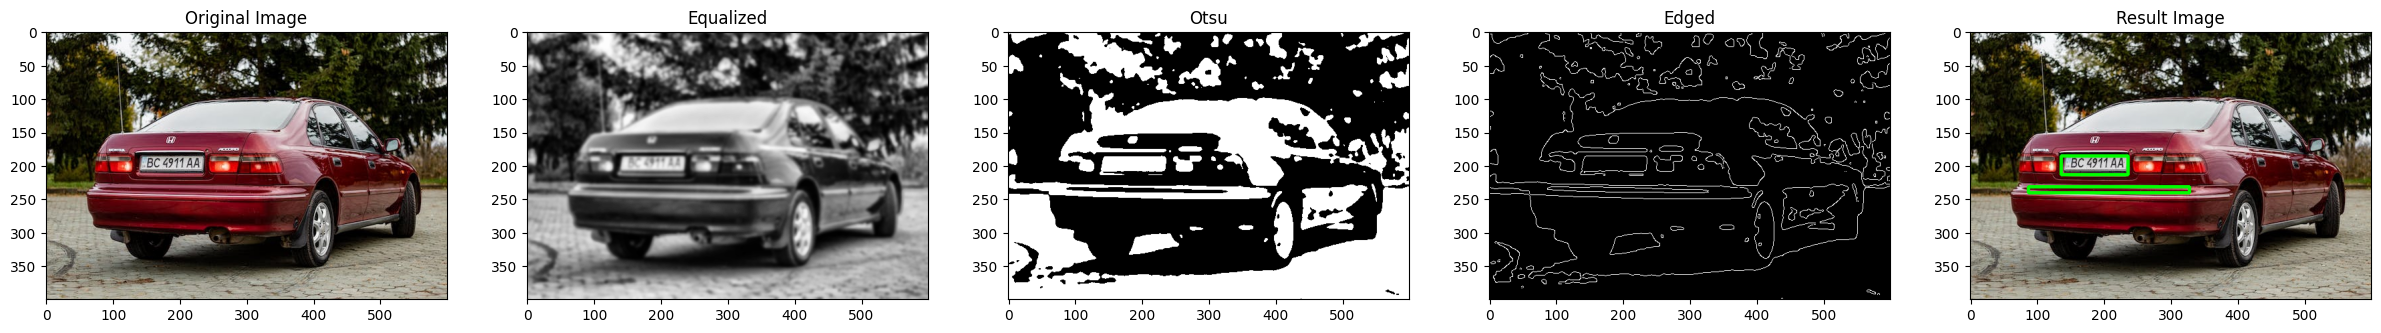

In [18]:
import cv2 as cv
import numpy as np

fig, axs = plt.subplots(1, 5, figsize=(30, 5))

#leemos imagen a clor img_color y la convertimos a niveles de gris
img_color = cv.imread('coche14.jpeg')
img_gris= cv.GaussianBlur(cv.imread('coche14.jpeg',cv.IMREAD_GRAYSCALE), (11,11),0)


# Plot the images in each subplot
axs[0].imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
axs[0].set_title("Original Image")

#aplicams un filtro gaussiano
# blur = cv.GaussianBlur(img_gris, (11,11), 0)
# cv.imshow("Gaussiano",blur)

#alicamos mejora de contraste adaptativo
clahe = cv.createCLAHE(clipLimit=1.5, tileGridSize=(8,8))
equ01 = clahe.apply(blur)


#aplicamos el métod de binarización de Otsu
otsu_threshold, otsu01 = cv.threshold( equ01, 0, 255, cv.THRESH_OTSU)


#Aplicamos Canny
edges = cv.Canny(otsu01, 150, 350)


#obtenemos contornos a artir de los bordes de Canny
contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#Seleccionamos aquellos contornos que cumplen determinada condición
long_contours = [cnt for cnt in contours if (cv.arcLength(cnt, True) > 200 
                                             and (cv.arcLength(cnt, True) < 700))]

#de cada contorno obtenemos las coordenadas que encierran en un cuadrado a dicho contorno
alto, ancho, canales = img_color.shape
for lonc in (long_contours):
    #lonc contiene las coordenadas que forman un contorno
    r= [x for [[x,y]]  in lonc]
    s=[y for [[x,y]]  in lonc]
    prop=(max(s)-min(s))-(max(r)-min(r))
    #seleccionamos aquellas cuya ancho sea mayor que su altura
    if ((max(s)> round(alto/2)) and (prop<0)):
        cv.rectangle(img_color,(min(r),min(s)),(max(r),max(s)),(0,255,0),3)             

axs[ 1].imshow(equ01, cmap='gray')
axs[ 1].set_title("Equalized")

axs[ 2].imshow(otsu01, cmap='gray')
axs[ 2].set_title("Otsu")

axs[ 3].imshow(edges, cmap='gray')
axs[ 3].set_title("Edged")

axs[ 4].imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
axs[ 4].set_title("Result Image")

# Automatically adjust the subplot parameters for a nicer layout

# plt.tight_layout()
# Display the figure
plt.show()



# Pregunta 7

# Pregunta 8 

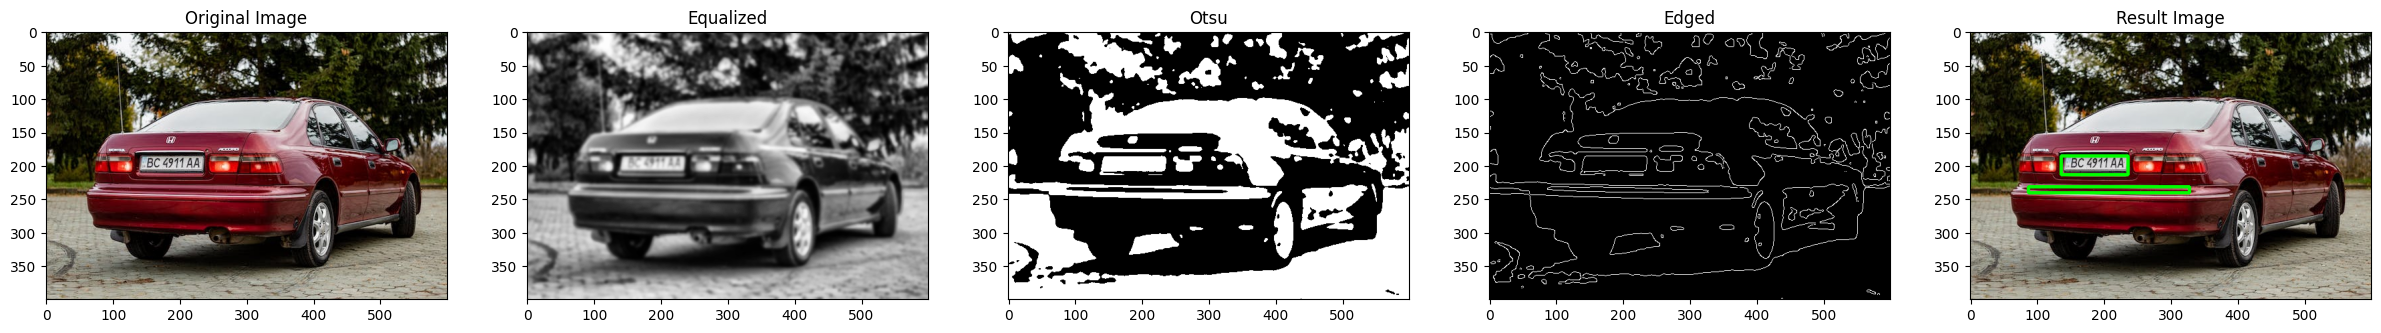

In [19]:
import cv2 as cv
import numpy as np

fig, axs = plt.subplots(1, 5, figsize=(30, 5))

#leemos imagen a clor img_color y la convertimos a niveles de gris
img_color = cv.imread('coche14.jpeg')
img_gris= cv.GaussianBlur(cv.imread('coche14.jpeg',cv.IMREAD_GRAYSCALE), (3,3),0)


# Plot the images in each subplot
axs[0].imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
axs[0].set_title("Original Image")

#aplicams un filtro gaussiano

#alicamos mejora de contraste adaptativo
clahe = cv.createCLAHE(clipLimit=1.5, tileGridSize=(8,8))
equ01 = clahe.apply(blur)


#aplicamos el métod de binarización de Otsu
otsu_threshold, otsu01 = cv.threshold( equ01, 0, 255, cv.THRESH_OTSU)


#Aplicamos Canny
edges = cv.Canny(otsu01, 150, 350)


#obtenemos contornos a artir de los bordes de Canny
contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#Seleccionamos aquellos contornos que cumplen determinada condición
long_contours = [cnt for cnt in contours if (cv.arcLength(cnt, True) > 200 
                                             and (cv.arcLength(cnt, True) < 700))]

#de cada contorno obtenemos las coordenadas que encierran en un cuadrado a dicho contorno
alto, ancho, canales = img_color.shape
for lonc in (long_contours):
    #lonc contiene las coordenadas que forman un contorno
    r= [x for [[x,y]]  in lonc]
    s=[y for [[x,y]]  in lonc]
    prop=(max(s)-min(s))-(max(r)-min(r))
    #seleccionamos aquellas cuya ancho sea mayor que su altura
    if ((max(s)> round(alto/2)) and (prop<0)):
        cv.rectangle(img_color,(min(r),min(s)),(max(r),max(s)),(0,255,0),3)             

axs[ 1].imshow(equ01, cmap='gray')
axs[ 1].set_title("Equalized")

axs[ 2].imshow(otsu01, cmap='gray')
axs[ 2].set_title("Otsu")

axs[ 3].imshow(edges, cmap='gray')
axs[ 3].set_title("Edged")

axs[ 4].imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
axs[ 4].set_title("Result Image")

# Automatically adjust the subplot parameters for a nicer layout

# plt.tight_layout()
# Display the figure
plt.show()



# Reconocimiento de placas para una lista de imágenes

coche01.jpeg
coche02.jpeg
coche03.jpeg
coche04.jpeg
coche08.jpg
coche09.jpg
coche14.jpeg
coche15.jpeg
coche16.jpeg
coche17.jpeg
cars3.png
cars11.png
cars14.png
cars34.png
cars53.png
cars54.png
cars65.png
cars37.png
cars39.png
cars80.png
cars96.png
cars129.png
cars133.png
cars167.png
cars208.png
cars296.png


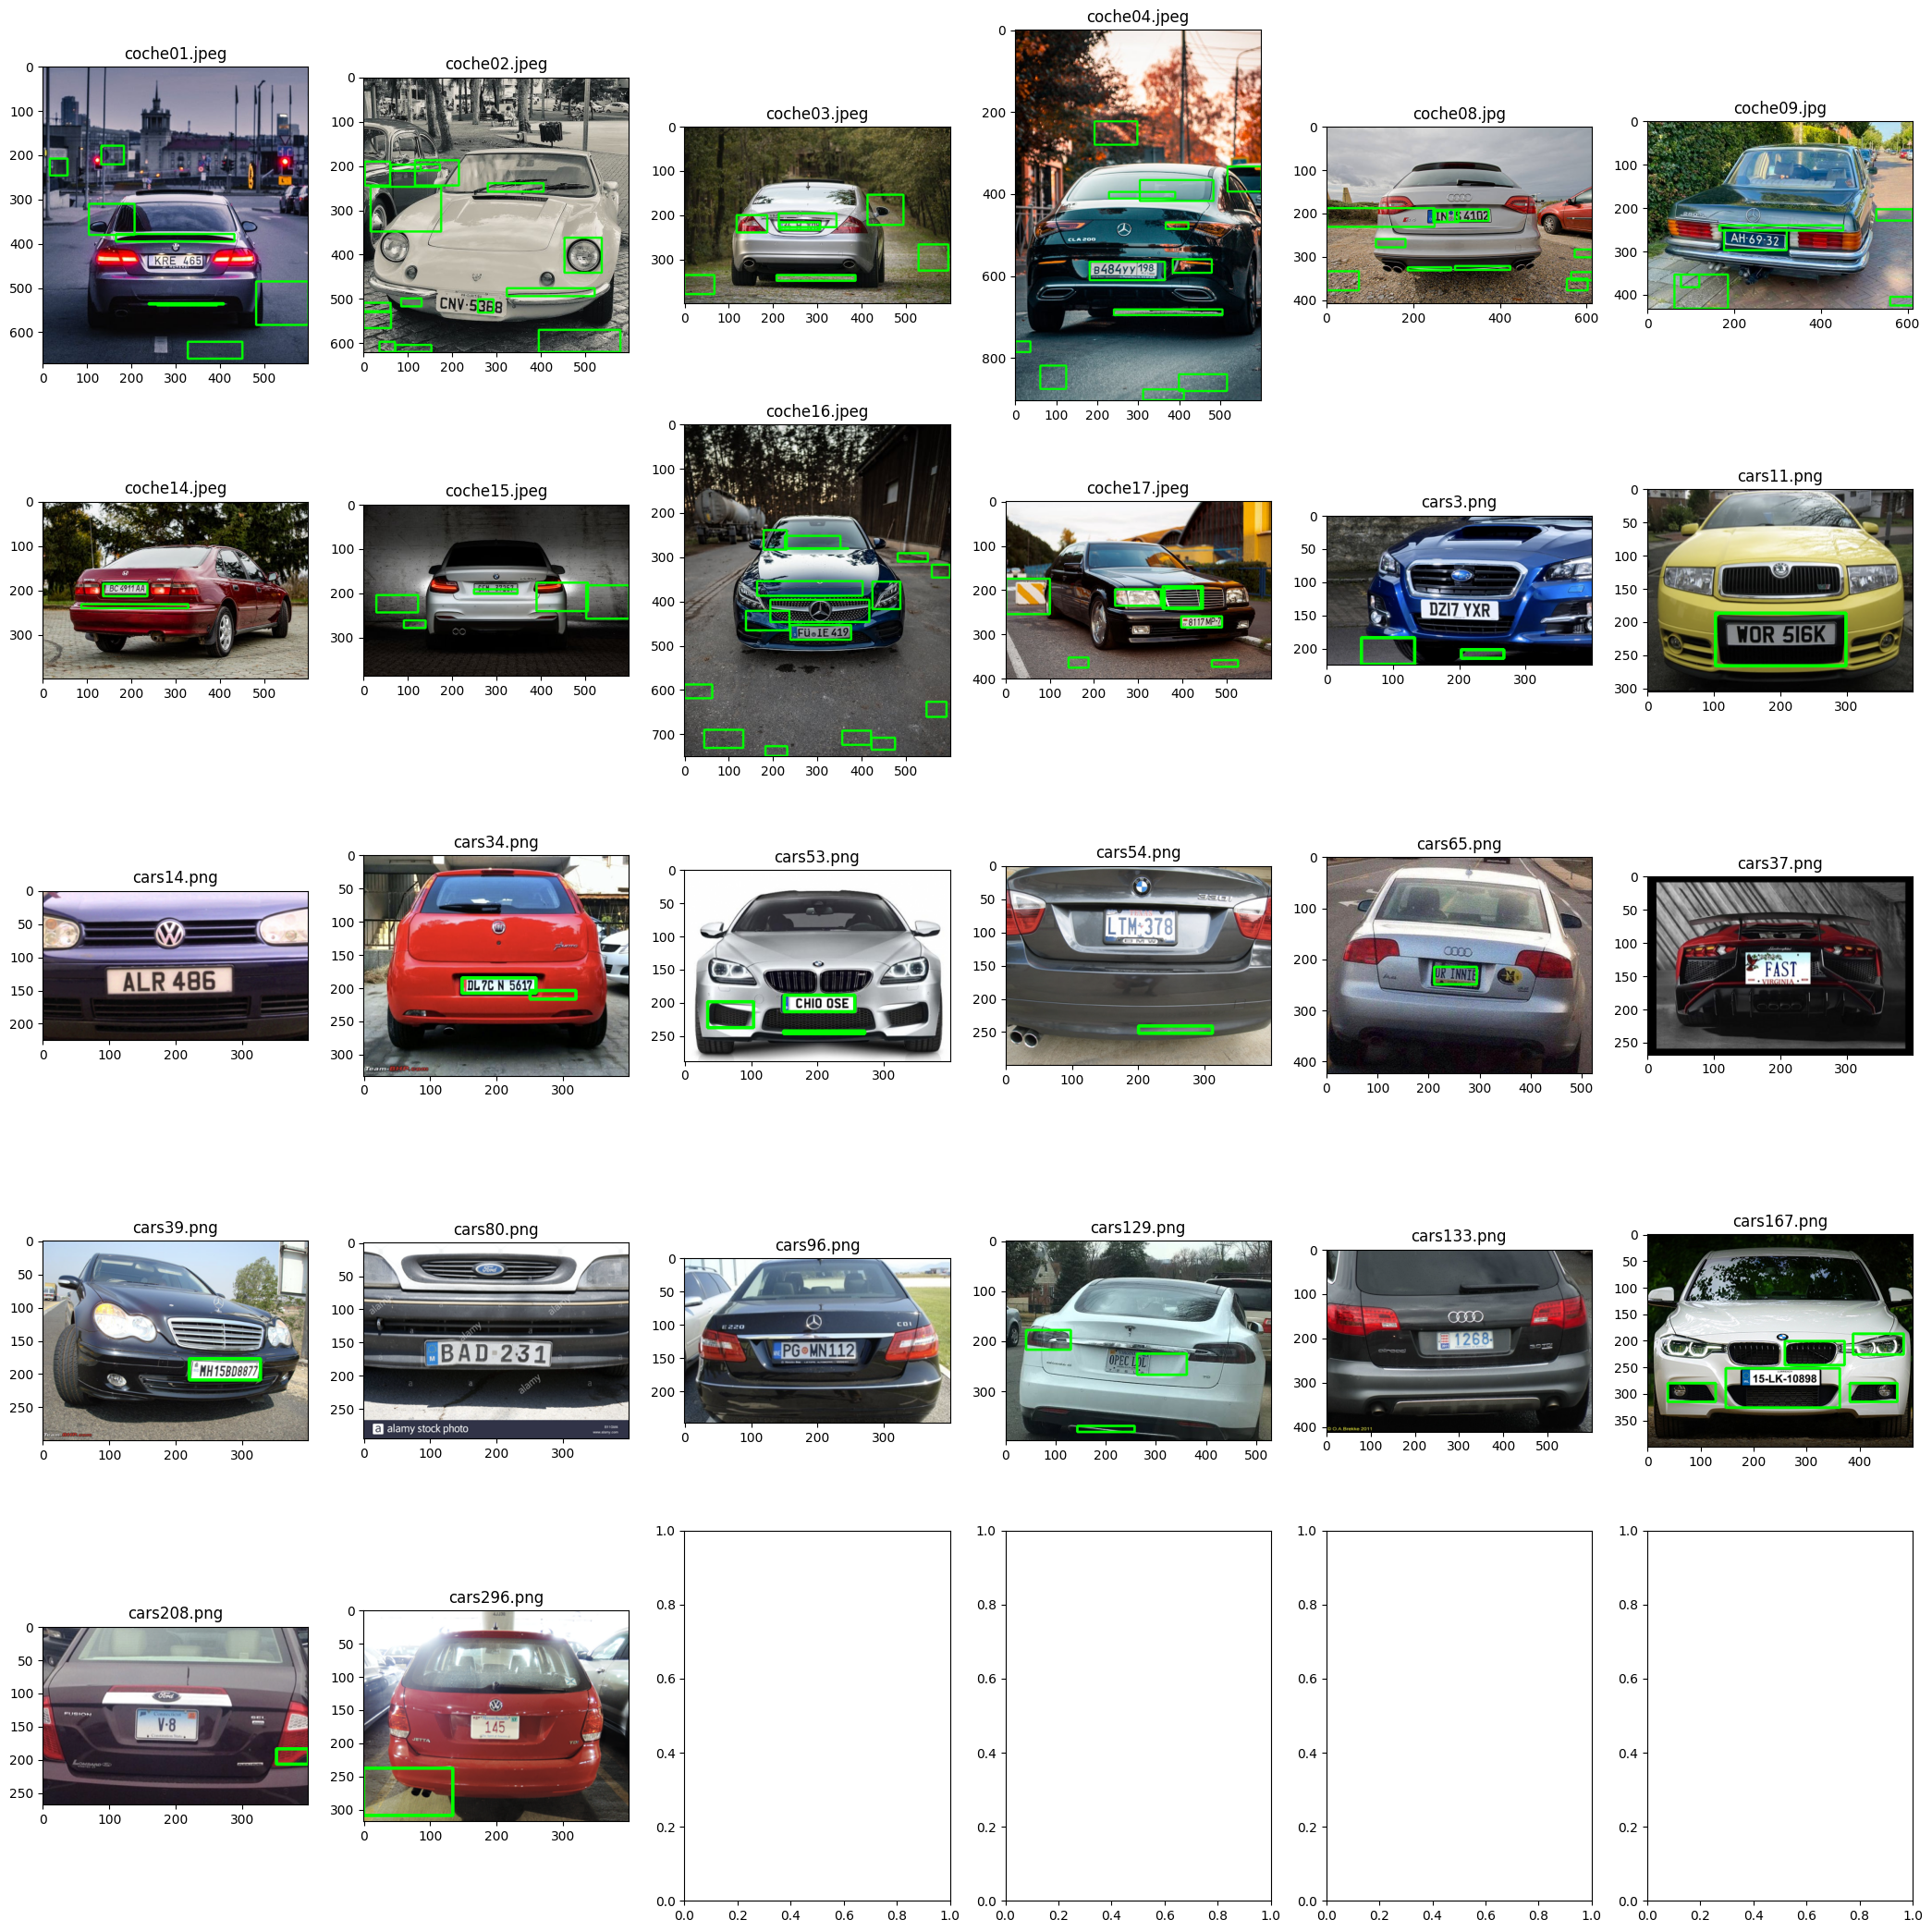

In [31]:
import cv2 as cv
import numpy as np
import math

imagenes={0:'coche01.jpeg',1:'coche02.jpeg',2:'coche03.jpeg', 3:'coche04.jpeg',
         6:'coche08.jpg', 7:'coche09.jpg',8: 'coche14.jpeg',9: 'coche15.jpeg',10:'coche16.jpeg', 11:'coche17.jpeg',
         12:'cars3.png',13:'cars11.png',14:'cars14.png',15:'cars34.png',16:'cars53.png',17:'cars54.png',18:'cars65.png',
         19: 'cars37.png', 20:'cars39.png',21:'cars80.png',22:'cars96.png',23:'cars129.png',24:'cars133.png',
         25: 'cars167.png', 26:'cars208.png',28:'cars296.png'}

n_images = len(imagenes)

def get_image_matrix_size(n_images):
    sqrt_length = math.sqrt(n_images)
    matrix_size = math.ceil(sqrt_length)
    return matrix_size

m = get_image_matrix_size(n_images)

fig, axs = plt.subplots(m-1, m, figsize=(3.5*m, 3.5*m))



i = 0

for im in imagenes.values():
    print(im)

    img_color = cv.imread(im)
    img_gris=cv.imread(im,cv.IMREAD_GRAYSCALE)
    
    blur = cv.GaussianBlur(img_gris, (11, 11), 0)

    clahe = cv.createCLAHE(clipLimit=1.5, tileGridSize=(8,8))
    equ01 = clahe.apply(blur)

    otsu_threshold, th4 = cv.threshold( equ01, 0, 255, cv.THRESH_OTSU)
    
    edges = cv.Canny(th4, 150, 350)


    contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    long_contours = [cnt for cnt in contours if (cv.arcLength(cnt, True) > 200 and (cv.arcLength(cnt, True) < 700))]
    #alto, ancho, canales = img_color.shape

    for lonc in (long_contours):
        r= [x for [[x,y]]  in lonc]
        s=[y for [[x,y]]  in lonc]
        prop=(max(s)-min(s))-(max(r)-min(r))
        if ((max(s)> round(alto/2)) and prop<0):
            cv.rectangle(img_color,(min(r),min(s)),(max(r),max(s)),(0,255,0),3) 

    row = i // m
    col = i % m
    
    axs[row, col].imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
    axs[row, col].set_title(im)
    i += 1

plt.tight_layout()
plt.show()
            


6